### 苹果股票分析项目

#### 导包

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 读取数据
- AAPL.csv文件

In [24]:
import pandas as pd

# 读取CSV文件
try:
    df = pd.read_csv(r'C:\Users\11322\Desktop\数据分析项目(课程资料&项目资料)\4.Pandas代码&美国总统竞选项目\data\11_苹果股票分析项目\AAPL.csv')
    print('数据基本信息：')
    df.info()

    # 显示数据集行数和列数
    rows, columns = df.shape

    if rows < 1000:
        # 短表数据（行数少于1000）查看全量数据信息
        print('数据全部内容信息：')
        print(df.to_csv(sep='\t', na_rep='nan'))
    else:
        # 长表数据查看数据前几行信息
        print('数据前几行内容信息：')
        print(df.head().to_csv(sep='\t', na_rep='nan'))

except FileNotFoundError:
    print("错误：未找到'AAPL.csv'文件，请将CSV文件与本脚本放在同一目录下。")
except Exception as e:
    print(f"错误：读取文件时出现异常: {e}")

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9296 entries, 0 to 9295
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9296 non-null   object 
 1   Open       9296 non-null   float64
 2   High       9296 non-null   float64
 3   Low        9296 non-null   float64
 4   Close      9296 non-null   float64
 5   Adj Close  9296 non-null   float64
 6   Volume     9296 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.5+ KB
数据前几行内容信息：
	Date	Open	High	Low	Close	Adj Close	Volume
0	1980-12-12	0.513393	0.515625	0.513393	0.513393	0.421597	117258400
1	1980-12-15	0.488839	0.488839	0.486607	0.486607	0.399601	43971200
2	1980-12-16	0.453125	0.453125	0.450893	0.450893	0.370272	26432000
3	1980-12-17	0.462054	0.464286	0.462054	0.462054	0.379437	21610400
4	1980-12-18	0.475446	0.477679	0.475446	0.475446	0.390436	18362400



####  检查数据类型



In [22]:
print("\n数据类型信息：")
print(df.dtypes)

# 定义预期的数据类型映射
expected_dtypes = {
    'Date': 'object',
    'Open': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Close': 'float64',
    'Adj Close': 'float64',
    'Volume': 'int64'
}

# 检查并报告不符合预期的数据类型
print("\n数据类型验证结果：")
mismatches = []
for column, expected_type in expected_dtypes.items():
    if column in df.columns:
        actual_type = str(df[column].dtype)
        if actual_type != expected_type:
            mismatches.append(f"列'{column}'：预期类型{expected_type}，实际类型{actual_type}")

if mismatches:
    print("\n以下列的数据类型不符合预期：")
    for issue in mismatches:
        print(f"- {issue}")
else:
    print("所有列的数据类型均符合预期。")


数据类型信息：
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

数据类型验证结果：
所有列的数据类型均符合预期。


#### 将'Date'这列数据转换为时间数据类型
- pd.to_datetime： 转为时间数据类型

In [25]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"\n已将'Date'列从 {df['Date'].dtype} 转换为 datetime64 类型")
else:
    print("错误：数据中不存在'Date'列")


已将'Date'列从 datetime64[ns] 转换为 datetime64 类型


#### 将'Date'设置为行索引
- set_index() : 设置行索引

In [26]:
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)
    print("\n已将'Date'列设置为行索引")
    print(f"当前索引名称：{df.index.name}，索引类型：{df.index.dtype}")
else:
    print("错误：数据中不存在'Date'列，无法设置为索引")


已将'Date'列设置为行索引
当前索引名称：Date，索引类型：datetime64[ns]


#### 绘制图形：收盘价格
- 字段Adj Close：已调整收盘价格

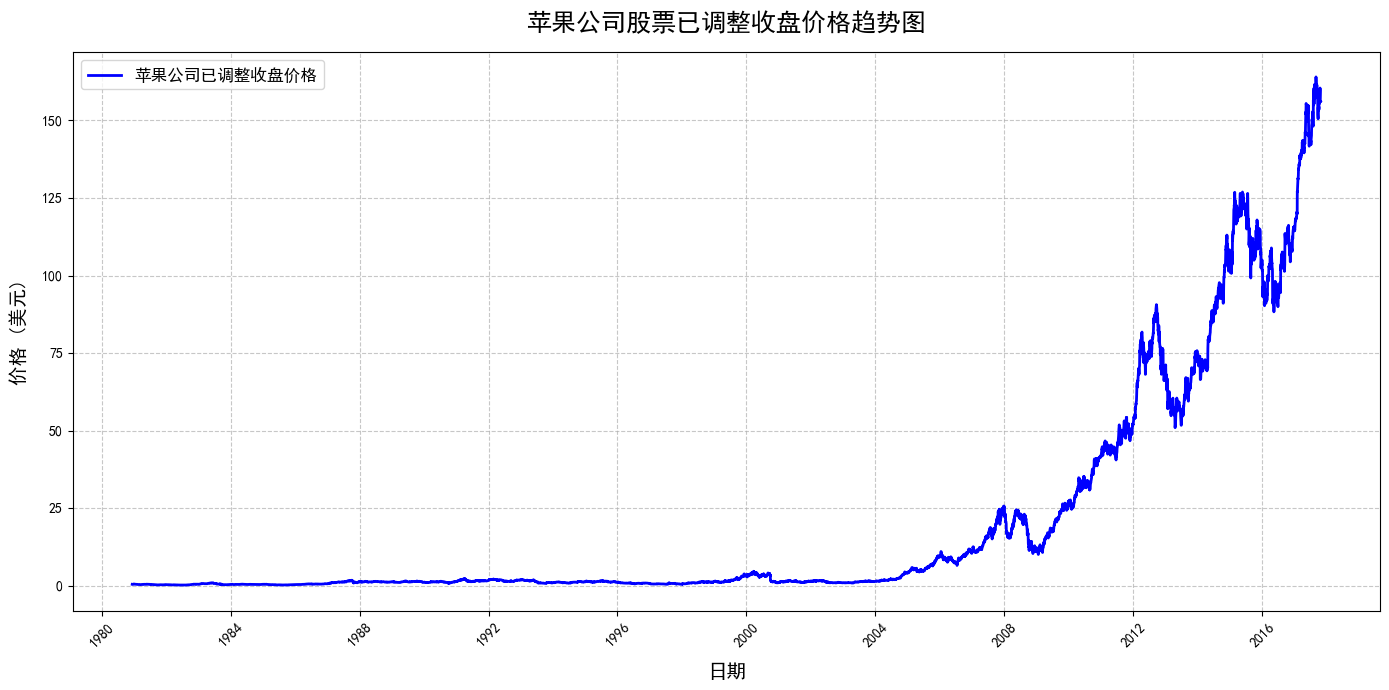

In [34]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # Windows系统自带黑体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建图形
plt.figure(figsize=(14, 7))

# 绘制已调整收盘价格曲线
plt.plot(df.index, df['Adj Close'], 
         label='苹果公司已调整收盘价格',
         color='blue', linewidth=2)

# 设置图形属性
plt.title('苹果公司股票已调整收盘价格趋势图', fontsize=18, pad=15)
plt.xlabel('日期', fontsize=14, labelpad=10)
plt.ylabel('价格 (美元)', fontsize=14, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left')

# 设置x轴日期格式
plt.xticks(rotation=45)

# 确保图形布局完整
plt.tight_layout()

# 显示图形
plt.show()